***
# TP 2 : Algorithmes de gradient et de Newton pour la minimisation d'une fonctionnelle quelconque
***

Dans cette deuxième séance, on cherche tout d'abord à appliquer l'algorithme de gradient construit au TP 1 à une fonctionnelle plus générale qu'une fonction quadratique puis à améliorer cet algorithme. 

Dans toute la séance, $f$ désigne une fonction $\mathcal{C}^2$ de $\mathbb{R}^n$ dans $\mathbb{R}$ possédant au moins un minimum sur $\mathbb{R}^n$. Dans les exemples informatiques, on s'intéressera en particulier à la fonction suivante sur $\mathbb{R}^2$, dite de Rosenbrock:
$$
R(x,y) = 10(y - x^2)^2 + (x - 1)^2.
$$

1) Montrer que $R$ possède un unique point de minimum qu'on déterminera.

2) Représenter les lignes de niveau de $R$ sur $[-1,3] \times [-1,4]$. Pour cela, on utilisera la fonction <i>contour</i> de la librairie <i>matplotlib.pyplot</i>. On pourra, pour commencer, représenter les lignes de niveau correspondant aux valeurs de $R$ suivantes : $0$, $0.1$, $0.2$, ... ,$1$. 

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import numpy as np
import math
def R(x,y):
    return 10*(y - x**2)**2 + (x - 1)**2
x = np.linspace(-1, 2, 500)
y = np.linspace(-1, 2, 500)
x, y = np.meshgrid(x, y)
z = R(x,y)
# Tracé des lignes de niveau
k1 = np.linspace(0, 1, 10)
k2 = [2,10,20,100]
k = np.concatenate([k1, k2])
#print(k)
plt.contour(x, y, z, k)
plt.show()

<Figure size 640x480 with 1 Axes>

3) On rappelle que l'algorithme du gradient à pas fixe appliqué à une fonction $f$ est défini par
$$
x_{k+1} = x_k + \rho d_k, \quad d_k = -\nabla f(x_k),
$$
avec $\rho >0$ le pas de l'algorithme. On peut montrer que pour un pas bien choisi, et sous certaines conditions
sur f, alors $(x_k)$ converge vers un minimum de $f$. 

Adapter l'algorithme de gradient à pas fixe GPF écrit lors de la première séance pour construire une nouvelle fonction GPF2 réalisant la recherche d'un minimum de $f$.

In [3]:
def GPF2(f,nablaf,u0,epsilon,maxiter,rho):
    u=u0
    nbiter=0
    residu=np.linalg.norm(nablaf(u))
    while (nbiter<maxiter)&(residu>epsilon):
        nbiter=nbiter+1
        u=u-rho*(nablaf(u))
        residu=np.linalg.norm(nablaf(u))
    return [u, nbiter, residu]

4) Appliquer l'algorithme précédent au cas de la fonction de Rosenbrock. Que trouve t-on pour $x_0=[1;0]$, $\epsilon=10^{-4}$ et $rho$ égal respectivement à $0.01, 0.02$ et $0.03$?

In [4]:
def Rosenbrock(u):
    x=u[0,0]
    y=u[1,0]
    return 10*(y - x**2)**2 + (x - 1)**2 
def nablaRosenbrock(u):
    x=u[0,0]
    y=u[1,0]   
    return np.array([[-40*x*(y - x**2) + 2*(x - 1),20*(y-x**2)]]).transpose()
u0 = np.array([[-1.2,-0.1]]).transpose()
#u0=np.random.rand(2,1)
maxiter = 200000
epsilon = 10**-14
rho = 0.01
result = GPF2(Rosenbrock,nablaRosenbrock,u0,epsilon,maxiter,rho)
result

[array([[ 1.],
        [ 1.]]), 7865, 9.9301366129891792e-15]

5) Pour déterminer le minimiseur d'une fonction $f$, on peut chercher à déterminer les points critiques de cette fonction, à savoir les $x \in \mathbb{R}^n$ tels que 
$$
\nabla f(x)=0.
$$
Pour résoudre ce système d'équations non linéaires, on va utiliser la méthode de Newton qui définit la suite de points $(x_k)_{k \in \mathbb{N}}$ par 
$$
x_{k+1} = x_k - p_k
$$
avec
$$
p_k = H_f(x_k)^{-1} \nabla f(x_k)
$$
où $H_f(x_k)$ représente la matrice Hessienne de $f$ au point $x_k$.

Ecrire un algorithme de Newton pour rechercher un minimum
d'une fonction  $f \, \in \, \mathcal{C}^2(\mathbb{R}^n;\mathbb{R})$. Pour déterminer $p_k$, on n'inversera pas la matrice $H_f(x_k)$ mais on résoudra un système linéaire à l'aide de la commande <i>np.linalg.solve</i>.

Appliquer l'algorithme précédent au cas de la fonction de Rosenbrock et comparer les résultats obtenus avec ceux de la méthode du gradient.

In [5]:
def Newton(f,nablaf,hessf,u0,epsilon,maxiter):
    u=u0
    nbiter=0
    residu=np.linalg.norm(nablaf(u))
    while (nbiter<maxiter)&(residu>epsilon):
        nbiter=nbiter+1
        d=np.matmul(np.linalg.inv(hessf(u)),nablaf(u))
        u=u-d
        residu=np.linalg.norm(nablaf(u))
    return [u, nbiter, residu]

In [6]:
def HessRosenbrock(u):
    x=u[0,0]
    y=u[1,0]   
    return np.array([[-40*y+120*x**2+2,-40*x],[-40*x,20]])
u0 = np.array([[0.1,1.2]]).transpose()
result=Newton(Rosenbrock,nablaRosenbrock,HessRosenbrock,u0,10**-5,maxiter)
result

[array([[ 0.99999998],
        [ 0.99999996]]), 5, 3.9329336360655302e-08]

In [7]:
def GPF2bis(f,nablaf,u0,epsilon,maxiter,rho):
    u=u0
    utot=u.transpose()
    nbiter=0
    residu=np.linalg.norm(nablaf(u))
    while (nbiter<maxiter)&(residu>epsilon):
        nbiter=nbiter+1
        u=u-rho*(nablaf(u))
        residu=np.linalg.norm(nablaf(u))
        utot=np.concatenate([utot,u.transpose()])
    return utot   # sort tout l'historique de la suite des u_k (matrice par concaténation)

In [36]:
def Newtonbis(f,nablaf,hessf,u0,epsilon,maxiter):
    u=u0
    utot=u.transpose()
    nbiter=0
    residu=np.linalg.norm(nablaf(u))
    while (nbiter<maxiter)&(residu>epsilon):
        nbiter=nbiter+1
        d=np.matmul(np.linalg.inv(hessf(u)),nablaf(u))
        u=u-d
        residu=np.linalg.norm(nablaf(u))
        utot=np.concatenate([utot,u.transpose()])
    return utot

In [39]:
maxiter = 200000
epsilon = 10**-4
rho = 0.01
u0 = np.array([[0.1,1.2]]).transpose()
result2 = GPF2bis(Rosenbrock,nablaRosenbrock,u0,epsilon,maxiter,rho)
result3 = Newtonbis(Rosenbrock,nablaRosenbrock,HessRosenbrock,u0,10**-5,maxiter)

array([[ 0.1       ,  1.2       ],
       [ 0.06052632,  0.00210526],
       [ 0.97160758,  0.11395222],
       [ 0.97322066,  0.94715585],
       [ 0.99999861,  0.99928015],
       [ 0.99999998,  0.99999996]])

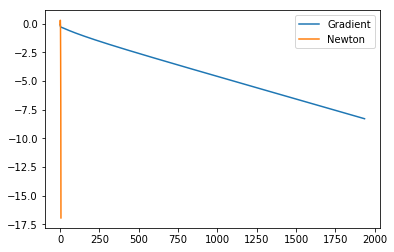

In [44]:
x2=np.arange(1,result2.shape[0]+1,1)
y2=[]
for i in np.arange(result2.shape[0]):
    y2=np.concatenate([y2,[np.linalg.norm(result2[i,:]-np.array([[1,1]]))]])
x3=np.arange(1,result3.shape[0]+1,1)
y3=[]
for i in np.arange(result3.shape[0]):
    y3=np.concatenate([y3,[np.linalg.norm(result3[i,:]-np.array([[1,1]]))]])  
fig,ax = plt.subplots()
ax.plot(x2,np.log(y2), label='Gradient')
ax.plot(x3,np.log(y3), label='Newton')
ax.legend()
plt.show()